In [1]:
from my_demo_fn import main
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from typing import List, Tuple

%load_ext autoreload
%autoreload 2

/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_last_indices_of_consecutive_labels(df):
    last_indices = {}
    last_label = None

    for index, row in df.iterrows():
        current_label = row['contact_label']
        # If the current label is different from the last one, update the dictionary
        if current_label != last_label:
            if last_label is not None:  # to skip the very first label
                last_indices[last_index] = last_label
            last_label = current_label
        last_index = index  # keep track of the last index
    
    # Add the last label and index after the loop
    last_indices[last_index] = current_label

    return last_indices


def plot_colored_horizontal_lines(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=None):
    """
    Plot two colored horizontal lines with labels to the left of them.

    :param col_dict1: Dictionary for the first line with keys as the end index of the color and values as the colors
    :param col_dict2: Dictionary for the second line with keys as the end index of the color and values as the colors
    :param line_height: Height of the lines
    :param label_offset: Offset to control the distance between lines and labels
    :param x_ticks_interval: Interval for x-axis ticks (set to None for automatic ticks)

    Example:
        col_dict1 = {15: 'blue', 20: 'red', 200: 'pink'}
        col_dict2 = {10: 'green', 30: 'purple', 90: 'orange', 120: "green"}
        plot_colored_horizontal_lines(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=50)
    """
    line_width = 10

    # Calculate figure height based on line_height and x_ticks_interval
    figure_height = line_height * 1.25 if x_ticks_interval else line_height

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(line_width, figure_height))

    # Initial start position for the first line
    start1 = 0
    for end, color in sorted(col_dict1.items()):
        ax.plot([start1, end], [0, 0], color=color, lw=line_width, solid_capstyle='butt')
        start1 = end

    # Initial start position for the second line
    start2 = 0
    for end, color in sorted(col_dict2.items()):
        ax.plot([start2, end], [-line_height, -line_height], color=color, lw=line_width, solid_capstyle='butt')
        start2 = end

    # Set the limits for the x-axis and y-axis
    max_x = max(max(col_dict1.keys()), max(col_dict2.keys()))
    ax.set_xlim(0, max_x)
    ax.set_ylim(-2 * line_height, line_height)

    # Remove the y-axis
    ax.yaxis.set_visible(False)

    # Remove the spines of the plot
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add labels to the left of the lines with appropriate offset
    ax.text(-label_offset, 0, "Pred:", va='center', ha='right', fontsize=12, color='black')
    ax.text(-label_offset, -line_height, "GT:", va='center', ha='right', fontsize=12, color='black')

    # Set x-axis ticks every x_ticks_interval units if specified
    if x_ticks_interval is not None:
        ax.set_xticks(range(0, int(max_x) + 1, x_ticks_interval))
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis ticks by 45 degrees

    # Show the plot
    plt.tight_layout()
    plt.show()


def plot_colored_horizontal_lines2(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=None):
    """
    Plot two colored horizontal lines with labels to the left of them.

    :param col_dict1: Dictionary for the first line with keys as the end index of the color and values as the colors
    :param col_dict2: Dictionary for the second line with keys as the end index of the color and values as the colors
    :param line_height: Height of the lines
    :param label_offset: Offset to control the distance between lines and labels
    :param x_ticks_interval: Interval for x-axis ticks (set to None for automatic ticks)

    Example:
        col_dict1 = {15: 'blue', 20: 'red', 200: 'pink'}
        col_dict2 = {10: 'green', 30: 'purple', 90: 'orange', 120: "green"}
        plot_colored_horizontal_lines(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=50)
    """
    line_width = 10

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(line_width, line_height))

    # Initial start position for the first line
    start1 = 0
    for end, color in sorted(col_dict1.items()):
        ax.plot([start1, end], [0, 0], color=color, lw=line_width, solid_capstyle='butt')
        start1 = end

    # Initial start position for the second line
    start2 = 0
    for end, color in sorted(col_dict2.items()):
        ax.plot([start2, end], [-line_height, -line_height], color=color, lw=line_width, solid_capstyle='butt')
        start2 = end

    # Set the limits for the x-axis and y-axis
    max_x = max(max(col_dict1.keys()), max(col_dict2.keys()))
    ax.set_xlim(0, max_x)
    ax.set_ylim(-2 * line_height, line_height)

    # Remove the y-axis
    ax.yaxis.set_visible(False)

    # Remove the spines of the plot
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add labels to the left of the lines with appropriate offset
    ax.text(-label_offset, 0, "Pred:", va='center', ha='right', fontsize=12, color='black')
    ax.text(-label_offset, -line_height, "GT:", va='center', ha='right', fontsize=12, color='black')

    # Set x-axis ticks every x_ticks_interval units if specified
    if x_ticks_interval is not None:
        ax.set_xticks(range(0, int(max_x) + 1, x_ticks_interval))
        ax.tick_params(axis='x', rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

def comparison_dicts(gt_transitions: List[tuple], max_len) -> Tuple[dict]:
    """
    Args:
        gt_transitions: List of tuples of ground truth transition frames in form [(start1, end1), (start2, end2) ...]
    """

    def transition_to_dict(trns: List[Tuple[int, int]]) -> dict:
        output_dict = {}
        for bound in trns:
            output_dict[bound[0]] = "red"
            output_dict[bound[1]] = "green"
        return output_dict
    
    trans_dict_gt = transition_to_dict(gt_transitions)
    trans_dict_gt[max_len] = "red"  # need to make remaining frames without contact red
    return trans_dict_gt


def get_last_indices_of_consecutive_labels2(df, transformation_dict):
    last_indices = {}
    last_label = None

    for index, row in df.iterrows():
        current_label = row['contact_label_pred']
        # If the current label is different from the last one, update the dictionary
        if current_label != last_label:
            if last_label is not None:  # to skip the very first label
                # Transform the label using the transformation_dict
                transformed_label = transformation_dict.get(last_label, last_label)
                last_indices[last_index] = transformed_label
            last_label = current_label
        last_index = index  # keep track of the last index
    
    # Add the last label and index after the loop
    # Transform the label using the transformation_dict
    transformed_label = transformation_dict.get(current_label, current_label)
    last_indices[last_index] = transformed_label

    return last_indices

def condense_dataframe(df):
    """
    deals with duplicate images which have multiple contact states
    
    Condenses a pandas DataFrame by ensuring each 'image' entry is unique and retains
    the most relevant 'contact_label_pred' based on a set priority.

    The function operates under the rule that if multiple entries exist for the same 'image',
    it prioritizes keeping the entry with 'contact_label_pred' as "Portable Object Contact" over
    "Stationary Object Contact", and "Stationary Object Contact" over "No Contact". This is
    done by sorting the DataFrame according to the 'image' and a custom priority assigned to
    'contact_label_pred', then removing duplicate 'image' entries while keeping the entry with the
    highest-priority 'contact_label_pred'.
    """
    # Define a custom order for 'contact_label_pred'
    priority = {
        "Portable Object": 1,
        "Portable Object Contact": 1,
        "Stationary Object Contact": 2,
        "No Contact": 3
    }

    # Sort the DataFrame based on 'image' and the custom priority of 'contact_label_pred'

    df['priority'] = df['contact_label_pred'].map(priority)

    df = df.sort_values(by=['frame_id', 'priority'])

    # Drop the 'priority' column as it's no longer needed after sorting
    df.drop('priority', axis=1, inplace=True)

    # Remove duplicates, keeping the first occurrence
    df = df.drop_duplicates(subset='frame_id', keep='first')

    return df.iloc[df['frame_id'].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)

def condense_dataframe_hacky_temp(df):
    """
    deals with duplicate images which have multiple contact states
    
    Condenses a pandas DataFrame by ensuring each 'image' entry is unique and retains
    the most relevant 'contact_label_pred' based on a set priority.

    The function operates under the rule that if multiple entries exist for the same 'image',
    it prioritizes keeping the entry with 'contact_label_pred' as "Portable Object Contact" over
    "Stationary Object Contact", and "Stationary Object Contact" over "No Contact". This is
    done by sorting the DataFrame according to the 'image' and a custom priority assigned to
    'contact_label_pred', then removing duplicate 'image' entries while keeping the entry with the
    highest-priority 'contact_label_pred'.
    """
    # Define a custom order for 'contact_label_pred'
    priority = {
        "Portable Object": 1,
        "Portable Object Contact": 1,
        "Stationary Object Contact": 2,
        "No Contact": 3
    }

    # Sort the DataFrame based on 'image' and the custom priority of 'contact_label_pred'
    # TEMP UGLY FIX:
    print("here1")
    if "contact_label_pred" not in df.columns:
        df = df.rename(columns={'contact_label': 'contact_label_pred'})
    df['priority'] = df['contact_label_pred'].map(priority)

    print("here2")
    frame_id_name = "image" if "frame_id" not in df.columns else "frame_id"
    df = df.sort_values(by=[frame_id_name, 'priority'])

    # Drop the 'priority' column as it's no longer needed after sorting
    df.drop('priority', axis=1, inplace=True)

    # Remove duplicates, keeping the first occurrence
    df = df.drop_duplicates(subset=frame_id_name, keep='first')

    return df.iloc[df[frame_id_name].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)

def condense_dataframe_new(df):
    """
    deals with duplicate images which have multiple contact states
    
    Condenses a pandas DataFrame by ensuring each 'image' entry is unique and retains
    the most relevant 'contact_label' based on a set priority.

    The function operates under the rule that if multiple entries exist for the same 'image',
    it prioritizes keeping the entry with 'contact_label' as "Portable Object Contact" over
    "Stationary Object Contact", and "Stationary Object Contact" over "No Contact". This is
    done by sorting the DataFrame according to the 'image' and a custom priority assigned to
    'contact_label', then removing duplicate 'image' entries while keeping the entry with the
    highest-priority 'contact_label'.
    """
    # Define a custom order for 'contact_label'
    priority = {
        "Portable Object Contact": 1,
        "Stationary Object Contact": 2,
        "No Contact": 3
    }

    # Sort the DataFrame based on 'image' and the custom priority of 'contact_label'
    df['priority'] = df['contact_label_pred'].map(priority)
    df = df.sort_values(by=['frame_id', 'priority'])

    # Drop the 'priority' column as it's no longer needed after sorting
    df.drop('priority', axis=1, inplace=True)

    # Remove duplicates, keeping the first occurrence
    df = df.drop_duplicates(subset='frame_id', keep='first')

    return df.iloc[df['frame_id'].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)

def get_last_indices_of_consecutive_labels2_new(df, transformation_dict):
    last_indices = {}
    last_label = None

    for index, row in df.iterrows():
        current_label = row['contact_label_pred']
        # If the current label is different from the last one, update the dictionary
        if current_label != last_label:
            if last_label is not None:  # to skip the very first label
                # Transform the label using the transformation_dict
                transformed_label = transformation_dict.get(last_label, last_label)
                last_indices[last_index] = transformed_label
            last_label = current_label
        last_index = index  # keep track of the last index
    
    # Add the last label and index after the loop
    # Transform the label using the transformation_dict
    transformed_label = transformation_dict.get(current_label, current_label)
    last_indices[last_index] = transformed_label

    return last_indices

transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}

In [3]:
sr2_pred = main(save_imgs=False, img_dir='/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/sr2_shrunk')

Processing Images:  60%|█████▉    | 2564/4278 [01:57<01:18, 21.77it/s]

KeyboardInterrupt: 

In [29]:
# sr2_pred = sr2_pred.iloc[sr2_pred['image'].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)
sr2_pred_cond = condense_dataframe(sr2_pred)
sr2_pred_cond.to_csv("/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/sr2_pred_con1.csv", index=False)

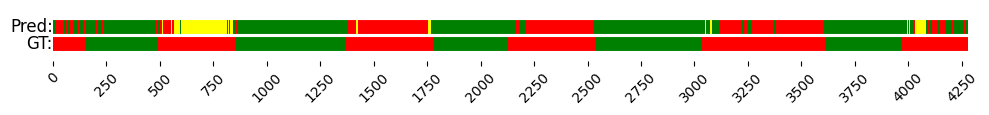

In [5]:
transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}
sr2_pred_dict = get_last_indices_of_consecutive_labels2(sr2_pred_cond, transformation_dict)

sr2_gt = [(156, 491), (850, 1364), (1775, 2127), (2537, 3036), (3612, 3972)]
gt_dict = comparison_dicts(sr2_gt, max_len=len(sr2_pred_cond))

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)


# WAIT WHAT START

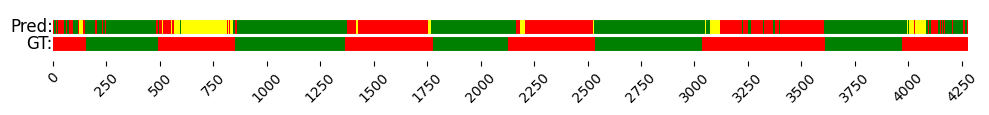

In [ ]:
def condense_dataframe2(df):
    """
    deals with duplicate images which have multiple contact states
    
    Condenses a pandas DataFrame by ensuring each 'image' entry is unique and retains
    the most relevant 'contact_label_pred' based on a set priority.

    The function operates under the rule that if multiple entries exist for the same 'image',
    it prioritizes keeping the entry with 'contact_label_pred' as "Portable Object Contact" over
    "Stationary Object Contact", and "Stationary Object Contact" over "No Contact". This is
    done by sorting the DataFrame according to the 'image' and a custom priority assigned to
    'contact_label_pred', then removing duplicate 'image' entries while keeping the entry with the
    highest-priority 'contact_label_pred'.
    """
    # Define a custom order for 'contact_label_pred'
    priority = {
        "Portable Object": 3,
        # "Portable Object Contact": 2,
        "Stationary Object Contact": 1,
        "No Contact": 2
    }

    # Sort the DataFrame based on 'image' and the custom priority of 'contact_label_pred'
    df['priority'] = df['contact_label_pred'].map(priority)
    df = df.sort_values(by=['frame_id', 'priority'])

    # Drop the 'priority' column as it's no longer needed after sorting
    df.drop('priority', axis=1, inplace=True)

    # Remove duplicates, keeping the first occurrence
    df = df.drop_duplicates(subset='frame_id', keep='first')

    return df.iloc[df['frame_id'].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)

sr2_pred_cond = condense_dataframe(sr2_pred)
transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}
sr2_pred_dict = get_last_indices_of_consecutive_labels2(sr2_pred_cond, transformation_dict)

sr2_gt = [(156, 491), (850, 1364), (1775, 2127), (2537, 3036), (3612, 3972)]
gt_dict = comparison_dicts(sr2_gt, max_len=len(sr2_pred_cond))

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)

In [33]:
tmp = sr2_pred.iloc[sr2_pred['frame_id'].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)
tmp[tmp["frame_id"] == "519_sh2.jpg"]

,frame_id,contact_label_pred,probability,priority
1061,519_sh2.jpg,Stationary Object Contact,99,1.0
1062,519_sh2.jpg,Portable Object,99,3.0


In [36]:
main(save_imgs=True, verbose=True)

load checkpoint models/res101_handobj_100K/pascal_voc/faster_rcnn_1_8_132028.pth
loaded model successfully!
image dir = images
save dir = images_det
Loaded 1 images.


Processing Images:   0%|          | 0/1 [00:00<?, ?it/s]

519_sh2.jpg: Left hand: F 1.00
[167, 165, 316, 316]
519_sh2.jpg: Left hand: P 1.00
[375, 186, 474, 313]


Processing Images: 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]


,frame_id,contact_label_pred,probability
0,519_sh2.jpg,Stationary Object Contact,99
1,519_sh2.jpg,Portable Object,99


# old main vs current

In [13]:
sr2_pred = main(save_imgs=False, img_dir='/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/sr2_shrunk')


Processing Images: 100%|██████████| 4278/4278 [03:13<00:00, 22.08it/s]


ValueError: invalid literal for int() with base 10: 'Portable Object'

In [19]:
display(sr2_pred)

,image,contact_label,probability
0,368_sh2.jpg,Portable Object,99
1,368_sh2.jpg,Portable Object,98
2,3919_sh2.jpg,Portable Object,99
3,3919_sh2.jpg,Portable Object,99
4,1441_sh2.jpg,Stationary Object Contact,99
...,...,...,...
8849,727_sh2.jpg,No Contact,99
8850,1021_sh2.jpg,Portable Object,99
8851,1021_sh2.jpg,Portable Object,99
8852,32_sh2.jpg,Portable Object,99


In [20]:
sr2_pred_to_save = sr2_pred.iloc[sr2_pred["image"].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)
display(sr2_pred_to_save)
sr2_pred_to_save.to_csv("/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/main_old_full.csv")

,image,contact_label,probability
0,0_sh2.jpg,Stationary Object Contact,99
1,0_sh2.jpg,Portable Object,99
2,1_sh2.jpg,Portable Object,99
3,1_sh2.jpg,Stationary Object Contact,99
4,2_sh2.jpg,Stationary Object Contact,99
...,...,...,...
8849,4275_sh2.jpg,Stationary Object Contact,99
8850,4276_sh2.jpg,Stationary Object Contact,99
8851,4276_sh2.jpg,Portable Object,99
8852,4277_sh2.jpg,Stationary Object Contact,99


here1
here2


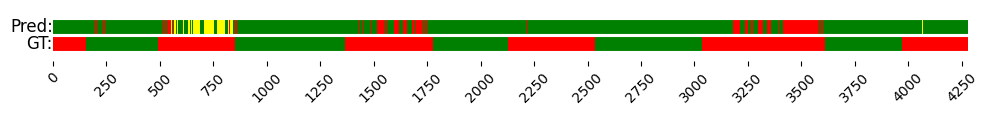

In [21]:

sr2_pred_cond = condense_dataframe_hacky_temp(sr2_pred)
transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}
sr2_pred_dict = get_last_indices_of_consecutive_labels2(sr2_pred_cond, transformation_dict)

sr2_gt = [(156, 491), (850, 1364), (1775, 2127), (2537, 3036), (3612, 3972)]
gt_dict = comparison_dicts(sr2_gt, max_len=len(sr2_pred_cond))

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)

In [4]:
from my_demo_fn import main_buggy
sr2_pred2 = main_buggy(save_imgs=False, img_dir='/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/sr2_shrunk')


Processing Images: 100%|██████████| 4278/4278 [02:58<00:00, 23.95it/s]


In [26]:
sr2_pred2_to_save = sr2_pred2.iloc[sr2_pred2["frame_id"].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)
# sr2_pred2_to_save.to_csv("/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/main_new_full.csv")

In [32]:
display(sr2_pred_to_save.rename(columns={'image': 'frame_id', "contact_label": "contact_label_pred"}))
display(sr2_pred2_to_save)

sr2_pred_to_save.rename(columns={'image': 'frame_id', "contact_label": "contact_label_pred"}).equals(sr2_pred2_to_save)

,frame_id,contact_label_pred,probability
0,0_sh2.jpg,Stationary Object Contact,99
1,0_sh2.jpg,Portable Object,99
2,1_sh2.jpg,Portable Object,99
3,1_sh2.jpg,Stationary Object Contact,99
4,2_sh2.jpg,Stationary Object Contact,99
...,...,...,...
8849,4275_sh2.jpg,Stationary Object Contact,99
8850,4276_sh2.jpg,Stationary Object Contact,99
8851,4276_sh2.jpg,Portable Object,99
8852,4277_sh2.jpg,Stationary Object Contact,99


,frame_id,contact_label_pred,probability
0,0_sh2.jpg,Stationary Object Contact,99
1,0_sh2.jpg,Portable Object,99
2,1_sh2.jpg,Portable Object,99
3,1_sh2.jpg,Stationary Object Contact,99
4,2_sh2.jpg,Stationary Object Contact,99
...,...,...,...
8849,4275_sh2.jpg,Stationary Object Contact,99
8850,4276_sh2.jpg,Stationary Object Contact,99
8851,4276_sh2.jpg,Portable Object,99
8852,4277_sh2.jpg,Stationary Object Contact,99


False

In [38]:
df2 = sr2_pred2_to_save.drop("probability", axis=1)
df1 = sr2_pred_to_save.rename(columns={'image': 'frame_id', "contact_label": "contact_label_pred"}).drop("probability", axis=1)
# Assuming df1 and df2 are your DataFrames
# Checking if the DataFrames are equal
if not df1.equals(df2):
    # Finding where the differences are
    diff_locations = (df1 != df2).any(axis=None)
    print(f"Differences found at the following {len(df1[df1 != df2].stack())} locations:")
    print(diff_locations)

    # Filtering and printing differing rows
    differing_rows = df1[df1 != df2].stack()
    print("Differing rows:")
    print(differing_rows)

    # Filtering and printing differing columns
    differing_columns = df1.columns[df1.ne(df2).any()]
    print("Differing columns:")
    print(differing_columns)


Differences found at the following 164 locations:
True
Differing rows:
246   contact_label_pred    Portable Object
252   contact_label_pred    Portable Object
255   contact_label_pred    Portable Object
257   contact_label_pred    Portable Object
261   contact_label_pred    Portable Object
                                 ...       
8340  contact_label_pred    Portable Object
8342  contact_label_pred    Portable Object
8345  contact_label_pred    Portable Object
8350  contact_label_pred    Portable Object
8364  contact_label_pred    Portable Object
Length: 164, dtype: object
Differing columns:
Index(['contact_label_pred'], dtype='object')


In [27]:
sr2_pred2.iloc[sr2_pred2["contact_label_pred"].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)

ValueError: invalid literal for int() with base 10: 'Portable Object'

condensed


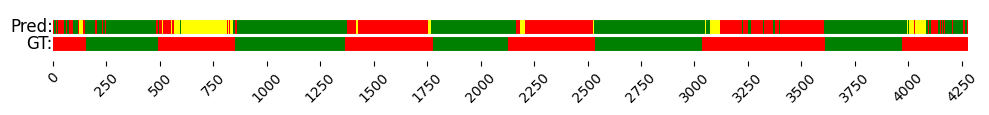

In [5]:

sr2_pred_cond2 = condense_dataframe_new(sr2_pred2)
print("condensed")
# sr2_pred_cond = pd.read_csv("/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/sv2_pred_weekold.csv")
# sr2_pred_cond.to_csv("/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/sv2_pred_errors.csv")

transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}
sr2_pred_dict = get_last_indices_of_consecutive_labels2_new(sr2_pred_cond2, transformation_dict)

sr2_gt = [(156, 491), (850, 1364), (1775, 2127), (2537, 3036), (3612, 3972)]
gt_dict = comparison_dicts(sr2_gt, max_len=len(sr2_pred_cond2))

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)

# WAIT WHAT END

In [8]:
sv2_results = main(save_imgs=False,
                   img_dir='/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv2_frames/sv2_shrunk', blue_refine=False)

Processing Images: 100%|██████████| 3851/3851 [02:37<00:00, 24.45it/s]


In [10]:
sv2_results_cond = condense_dataframe_new(sv2_results)

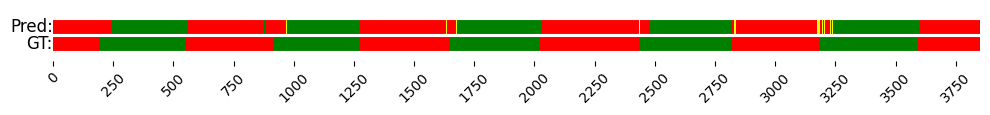

In [11]:
transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}
sr2_pred_dict = get_last_indices_of_consecutive_labels2_new(sv2_results_cond, transformation_dict)

sv2_gt = [(194, 554), (912, 1270), (1643, 2023), (2434, 2816), (3187, 3591)]
gt_dict = comparison_dicts(sv2_gt, len(sv2_results_cond))

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)

In [23]:
gt_dict = comparison_dicts(sv2_gt, len(sv2_results_cond))
gt_dict

{194: 'red',
 554: 'green',
 912: 'red',
 1270: 'green',
 1643: 'red',
 2023: 'green',
 2434: 'red',
 2816: 'green',
 3187: 'red',
 3591: 'green',
 3851: 'red'}

Processing Images: 100%|██████████| 3851/3851 [02:56<00:00, 21.88it/s]


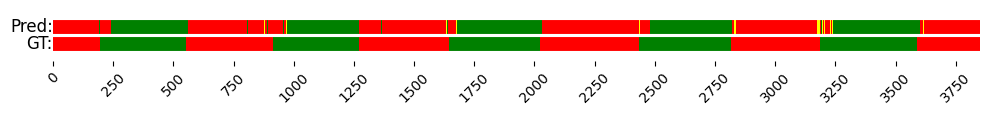

In [8]:
sv2_results = main(save_imgs=False, img_dir='/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv2_frames/sv2_shrunk', blue_refine=True)
sv2_results_cond = condense_dataframe(sv2_results)
sr2_pred_dict = get_last_indices_of_consecutive_labels2(sv2_results_cond, transformation_dict)

sv2_gt = [(194, 554), (912, 1270), (1643, 2023), (2434, 2816), (3187, 3591)]
gt_dict = comparison_dicts(sv2_gt, len(sv2_results_cond))

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)

# try blue refine. Should decrease false positives

In [22]:
sv2_results_cond.to_csv("/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv2_frames/sv2_pred.csv", index=False)

In [6]:
import csv

def csv_to_tuples(filename):
    data = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header row if it exists
        for row in reader:
            # Skip the first column and convert the rest to integers
            holding_transitions, not_holding_transitions = map(int, row[1:])
            data.append((holding_transitions, not_holding_transitions))
    return data

# Example usage:
filename = '/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv2_frames/changepoints.csv'
result = csv_to_tuples(filename)
print(result)

[(194, 554), (912, 1270), (1643, 2023), (2434, 2816), (3187, 3591)]


# sv1:

In [8]:
sv1_dir = "/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv1_frames/"

sv1_results = main(save_imgs=False, img_dir=sv1_dir + 'sv1_shrunk', blue_refine=True)


Processing Images: 100%|██████████| 15244/15244 [12:18<00:00, 20.65it/s]


KeyError: 'image_id'

In [18]:
transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}
sv1_results_cond = condense_dataframe(sv1_results)
sv1_pred_dict = get_last_indices_of_consecutive_labels2(sv1_results_cond, transformation_dict)
sv1_results_cond.to_csv("/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv1_frames/sv1_pred.csv", index=False)

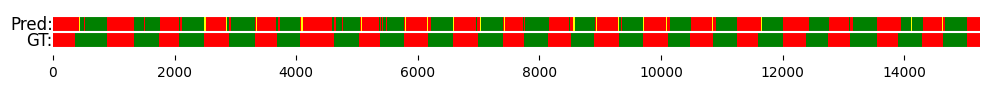

In [15]:
sv1_gt = csv_to_tuples(sv1_dir + "changepoints.csv")
gt_dict = comparison_dicts(sv1_gt, len(sv1_results_cond))

plot_colored_horizontal_lines(sv1_pred_dict, gt_dict)

# Functionize all

In [26]:
transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}

def pred_imgs(dir: str, shrunk_add: str):
    if dir[-1] != "/":
        raise ValueError("NOAH! DIR NEEDS TO END IN '/'")

    raw_preds = main(save_imgs=False, img_dir=dir + shrunk_add, blue_refine=True)
    preds_cond = condense_dataframe(raw_preds)
    preds_cond.to_csv(dir + "pred.csv", index=False)
    pred_dict = get_last_indices_of_consecutive_labels2(preds_cond, transformation_dict)


    gt = csv_to_tuples(dir + "changepoints.csv")
    gt_dict = comparison_dicts(gt, len(preds_cond))

    plot_colored_horizontal_lines(pred_dict, gt_dict)

Processing Images: 100%|██████████| 14337/14337 [11:22<00:00, 21.02it/s]


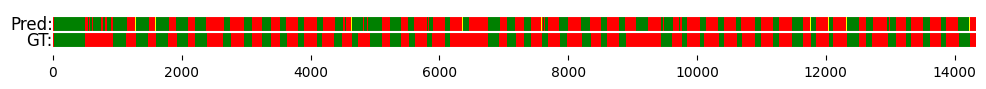

In [27]:
# directories = [
#     # '/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr1/',
#     '/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/',
# ]

# shrunks = [
#     # "sr1_shrunk",
#     "sr2_shrunk",
# ]

directories = [
    # '/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr1/',
    '/home/nripstein/Documents/thesis data/thesis labels/nr labels/all_nr/',
]

shrunks = [
    # "sr1_shrunk",
    "nr_shrunk",
]


for dir, shrunk in zip(directories, shrunks):
    pred_imgs(dir, shrunk)

# test on sr1

[autoreload of model.roi_layers.roi_align failed: Traceback (most recent call last):
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 345, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/p

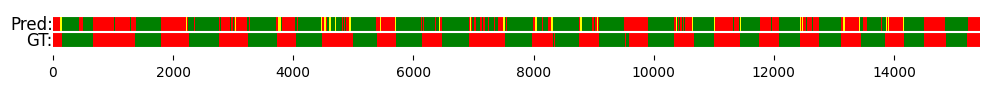

In [19]:
sv1_dir = "/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr1/"

sr1_results = main(save_imgs=False, img_dir=sv1_dir + 'sr1_shrunk', blue_refine=True)
sr1_results_cond = condense_dataframe(sr1_results)
sr1_pred_dict = get_last_indices_of_consecutive_labels2(sr1_results_cond, transformation_dict)

sv1_gt = csv_to_tuples(sv1_dir + "changepoints.csv")
gt_dict = comparison_dicts(sv1_gt, len(sr1_results_cond))

plot_colored_horizontal_lines(sr1_pred_dict, gt_dict)

Processing Images: 100%|██████████| 15432/15432 [19:23<00:00, 13.27it/s]


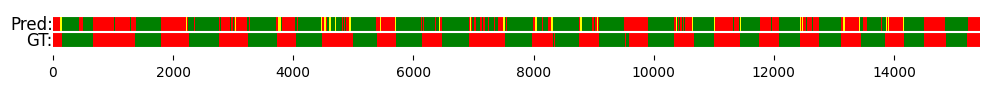

In [20]:
sr1_dir = "/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr1/"

sr1_results = main(save_imgs=True, img_dir=sr1_dir + 'sr1_shrunk', blue_refine=True)
sr1_results_cond = condense_dataframe(sr1_results)
sr1_pred_dict = get_last_indices_of_consecutive_labels2(sr1_results_cond, transformation_dict)

sv1_gt = csv_to_tuples(sr1_dir + "changepoints.csv")
gt_dict = comparison_dicts(sv1_gt, len(sr1_results_cond))

plot_colored_horizontal_lines(sr1_pred_dict, gt_dict)

In [3]:
GOPR4366_dir = '/home/nripstein/Documents/thesis data/lab participants/p6/'

GOPR4366_results = main(save_imgs=False, img_dir=GOPR4366_dir + 'GOPR4366c.mp4', blue_refine=True)


Extracting frames from GOPR4366c.mp4:   0%|          | 0/1740 [00:00<?, ?it/s]

Processing Images:  59%|█████▉    | 1030/1740 [01:11<00:46, 15.18it/s]

In [ ]:
display(GOPR4366_results)

,frame_id,contact_label_pred,probability,bbox,type,which
0,113_GOPR4366c.png,Stationary Object Contact,99,"[106, 165, 258, 331]",hand,Left
1,113_GOPR4366c.png,Stationary Object Contact,99,"[279, 181, 394, 330]",hand,Right
2,113_GOPR4366c.png,False,79,"[0, 0, 469, 390]",obj,False
3,1507_GOPR4366c.png,Portable Object,99,"[263, 174, 367, 330]",hand,Right
4,1507_GOPR4366c.png,Portable Object,99,"[113, 186, 276, 343]",hand,Left
...,...,...,...,...,...,...
5637,624_GOPR4366c.png,Stationary Object Contact,99,"[165, 3, 301, 132]",hand,Right
5638,624_GOPR4366c.png,False,93,"[18, 0, 466, 406]",obj,False
5639,1165_GOPR4366c.png,Portable Object,99,"[104, 115, 271, 336]",hand,Left
5640,1165_GOPR4366c.png,Portable Object,99,"[252, 153, 363, 315]",hand,Right


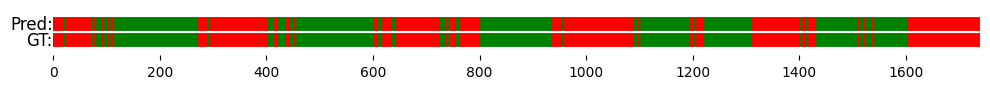

In [7]:
GOPR4366_results_cond = condense_dataframe(GOPR4366_results)
GOPR4366_pred_dict = get_last_indices_of_consecutive_labels2(GOPR4366_results_cond, transformation_dict)

GOPR4366_results_cond.to_csv(GOPR4366_dir + "GOPR4366_pred.csv", index=False)
plot_colored_horizontal_lines(GOPR4366_pred_dict, GOPR4366_pred_dict)

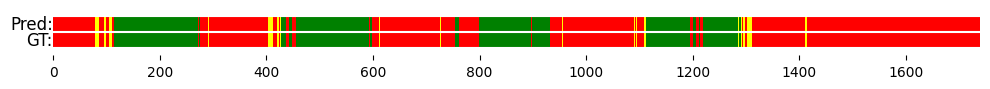

In [8]:
GOPR4366_results_cond = condense_dataframe_new(GOPR4366_results)
GOPR4366_pred_dict = get_last_indices_of_consecutive_labels2_new(GOPR4366_results_cond, transformation_dict)

GOPR4366_results_cond.to_csv(GOPR4366_dir + "GOPR4366_pred.csv", index=False)
plot_colored_horizontal_lines(GOPR4366_pred_dict, GOPR4366_pred_dict)